In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import scipy.stats as st

In [2]:
path = 'EmployeeAttrition.csv'
df = pd.read_csv(path)
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [3]:
# Compare Salary and Rating
# start with one employee, monthly data - use original dataframe. Manual selection to start. 
emp_info = df['Emp_ID'].value_counts()
# print(emp_info)
emp_2049 = df.loc[df['Emp_ID']==2049,:]
emp_2049.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
13725,2016-01-01,2049,39,Female,C23,Bachelor,100888,2011-10-24,NaN,1,3,2179960,3
13726,2016-02-01,2049,39,Female,C23,Bachelor,100888,2011-10-24,NaN,1,3,1713530,3
13727,2016-03-01,2049,39,Female,C23,Bachelor,100888,2011-10-24,NaN,1,3,4244770,3
13728,2016-04-01,2049,39,Female,C23,Bachelor,100888,2011-10-24,NaN,1,3,0,1
13729,2016-05-01,2049,39,Female,C23,Bachelor,100888,2011-10-24,NaN,1,3,0,1


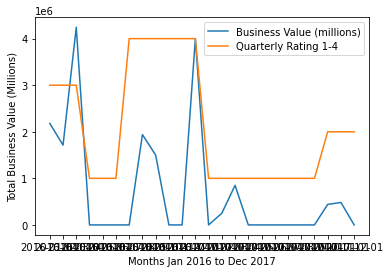

In [4]:
# plot time vs business value
# plot time vs rating
Fig_emp_2049 = plt.plot(emp_2049['MMM-YY'], emp_2049['Total Business Value'], label = 'Business Value (millions)')
rating = emp_2049['Quarterly Rating']*1000000
plt.plot(emp_2049['MMM-YY'], rating, label = 'Quarterly Rating 1-4')
plt.xlabel('Months Jan 2016 to Dec 2017')
plt.ylabel('Total Business Value (Millions)')
plt.legend()
plt.show()
# same problem with y values in scientific notation
# overlay quarterly rating
# set xticks with rotation
# Employee leaves in Dec 2017. How long was her rating at 1 before she left?

In [5]:
# Findings & notes on emp 2049
# joined 24 oct 2011 at designation 1.
# Jan 2016 (start of data set) designation 3
# Business value fluctuates between $4M and 0, with quarterly rating ranging from 4 to 1 to match
# 2017 - a year of poor ratings (9 months at 1, 3 months at 2) and low business value (8 months 0, remaining months under $1M)
# Last working day 14 Dec 2017

In [6]:
# find sample for designation change
emp_des = df.groupby('Emp_ID')['Designation'].nunique()
emp_des = emp_des.sort_values(ascending=False)
emp_des.head(45)
# 44 potential samples
emp_1031 = df.loc[df['Emp_ID']==1031,:]
emp_1031.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
6823,2016-01-01,1031,43,Male,C7,Bachelor,62213,2011-11-07,NaN,2,2,546200,2
6824,2016-02-01,1031,44,Male,C7,Bachelor,62213,2011-11-07,NaN,2,2,421640,2
6825,2016-03-01,1031,44,Male,C7,Bachelor,62213,2011-11-07,NaN,2,2,1463790,2
6826,2016-04-01,1031,44,Male,C7,Bachelor,62213,2011-11-07,NaN,2,2,108870,3
6827,2016-05-01,1031,44,Male,C7,Bachelor,62213,2011-11-07,NaN,2,2,438810,3


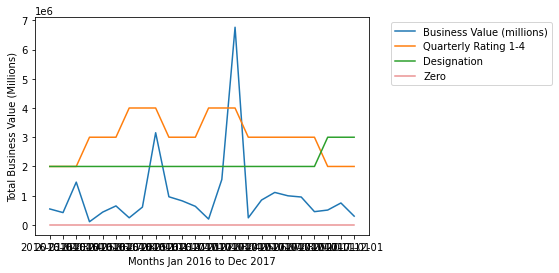

In [7]:
# Notes about sample 1031
# Employee joined Nov 2011 at designation 2. 
# Designation changed Oct 2017 from 2 to 3. Salary also increased from $62,213 to $68,434
# Business value for final quarter remains similar to previous quarters
# Rating final quarter dropped to 2
# Employee was still with the company final quarter

# Plot emp_1031

Fig_emp_1031 = plt.plot(emp_1031['MMM-YY'], emp_1031['Total Business Value'], label = 'Business Value (millions)')
rating = emp_1031['Quarterly Rating']*1000000
des = emp_1031['Designation']*1000000
zero = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.plot(emp_1031['MMM-YY'], rating, label = 'Quarterly Rating 1-4')
plt.plot(emp_1031['MMM-YY'], des, label = 'Designation')
plt.plot(emp_1031['MMM-YY'], zero, label = 'Zero', alpha=0.5)

plt.xlabel('Months Jan 2016 to Dec 2017')
plt.ylabel('Total Business Value (Millions)')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()
# when did designation change? Oct 2017

In [8]:
# Findings: harder to meet performance requirements at higher designations (based on this sample).
# Salary does increase with designation change

# generally good quarterly ratings (3 & 4)
# Business value always above 0. Values are moderate (1M) with 2 exceptions.
# Promotion to designation 3 after at least 21 months at D2 and 18 months high rating.
# It is possible that 1031 spent 5 years, 10 months at d2 before being promoted - we do not have access to data required.
# Last quarter (only quarter at D3), business value on par with previous performance and rating drops to 2.


In [9]:
# Find sample for salary change
emp_sal = df.groupby('Emp_ID')['Salary'].nunique()
emp_sal = emp_sal.sort_values(ascending=False)
emp_sal
emp_1877 = df.loc[df['Emp_ID']==1877,:]

# odd - joining designation 1 29/04/2016. Two days later her designation is 4. Error? 
# Oct 2017 - salary increase and designation change to 5. Last working date 28 Sep
# did she receive a promotion after 1 Sep 2017 and then quit?

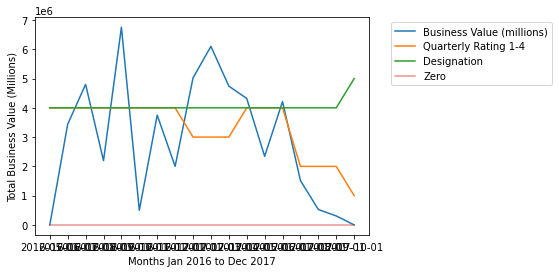

In [10]:
Fig_emp_1877 = plt.plot(emp_1877['MMM-YY'], emp_1877['Total Business Value'], label = 'Business Value (millions)')
rating = emp_1877['Quarterly Rating']*1000000
des = emp_1877['Designation']*1000000
zero = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.plot(emp_1877['MMM-YY'], rating, label = 'Quarterly Rating 1-4')
plt.plot(emp_1877['MMM-YY'], des, label = 'Designation')
plt.plot(emp_1877['MMM-YY'], zero, label = 'Zero', alpha=0.5)

plt.xlabel('Months Jan 2016 to Dec 2017')
plt.ylabel('Total Business Value (Millions)')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [11]:
# emp_2390
emp_2390 = df.loc[df['Emp_ID']==2390,:]
emp_2390.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
16075,2016-01-01,2390,44,Male,C28,College,46244,2015-05-30,NaN,1,1,820730,3
16076,2016-02-01,2390,45,Male,C28,College,46244,2015-05-30,NaN,1,1,572190,3
16077,2016-03-01,2390,45,Male,C28,College,46244,2015-05-30,NaN,1,1,1720550,3
16078,2016-04-01,2390,45,Male,C28,College,46244,2015-05-30,NaN,1,1,213110,4
16079,2016-05-01,2390,45,Male,C28,College,46244,2015-05-30,NaN,1,1,525530,4


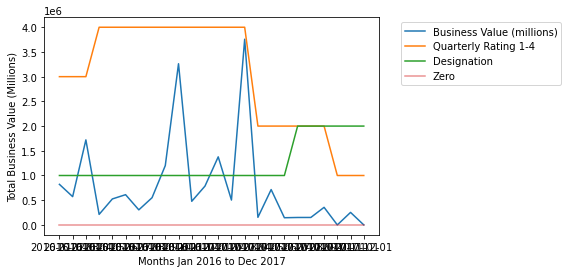

In [12]:
# plot sample 2390

Fig_emp_2390 = plt.plot(emp_2390['MMM-YY'], emp_2390['Total Business Value'], label = 'Business Value (millions)')
rating = emp_2390['Quarterly Rating']*1000000
des = emp_2390['Designation']*1000000
zero = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.plot(emp_2390['MMM-YY'], rating, label = 'Quarterly Rating 1-4')
plt.plot(emp_2390['MMM-YY'], des, label = 'Designation')
plt.plot(emp_2390['MMM-YY'], zero, label = 'Zero', alpha=0.5)

plt.xlabel('Months Jan 2016 to Dec 2017')
plt.ylabel('Total Business Value (Millions)')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [13]:
# Notes 2390
# joined 30 May 2015 at Designation 1. Still employed at Dec 2017
# 15 months of high ratings before designation change
# July 2017 designation change from 1 to 2 and salary increase from $46,244 to $51,383
#  Business value consistently above 0 until last quarter. Quarterly rating drops to 1.

# Findings: struggled to perform at higher designation.